# lesson2

In [0]:
#オリジナルのデータ
"""
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from keras.utils import np_utils
from PIL import Image
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.
X_test = X_test / 255.
    
nb_classes=10
y_train = np_utils.to_categorical(y_train, nb_classes)
"""

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd

def load_cifar10():
    
    # 学習データ
    x_train = np.load('/root/userspace/public/lesson2/data/x_train.npy')
    y_train = np.load('/root/userspace/public/lesson2/data/y_train.npy')

    # テストデータ
    x_test = np.load('/root/userspace/public/lesson2/data/x_test.npy')
    
    x_train = x_train / 255.
    x_test = x_test / 255.
    
    y_train = np.eye(10)[y_train]
    
    return (x_train, x_test, y_train)

x_train, x_test, y_train = load_cifar10()

In [0]:
from keras.applications import inception_resnet_v2
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D,BatchNormalization,Convolution2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger, ModelCheckpoint
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten

#vgg19ベース

model = Sequential()

model.add(Convolution2D(64, (3, 3),padding="same", input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
          
model.add(Convolution2D(128, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(Convolution2D(128, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
          
model.add(Convolution2D(256, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(Convolution2D(256, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(Convolution2D(256, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(Convolution2D(256, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(512, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Convolution2D(10, (3, 3),padding="same"))
#model.add(MaxPooling2D(pool_size=(4, 4)))
#model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [0]:
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train)

In [0]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
logger = CSVLogger('history.log')

(X_train2, X_val,y_train2, y_val) = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0001, verbose=1,monitor='val_acc',mode='max')
model_checkpoint = ModelCheckpoint("best.model", monitor='val_acc', save_best_only=True, verbose=1,mode='max')
earlystopper = EarlyStopping(monitor='val_acc',patience=10, verbose=1,mode='max')

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["acc"])
#result=model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_split=0.1,
#          callbacks=[earlystopper,logger,model_checkpoint,reduce_lr])
result=model.fit_generator(datagen.flow(X_train2, y_train2, batch_size=256), epochs=100, validation_data=(X_val,y_val),
          callbacks=[earlystopper,logger,model_checkpoint,reduce_lr])

Epoch 1/100
176/176 [==============================] - 80s 453ms/step - loss: 2.3704 - acc: 0.1235 - val_loss: 2.1206 - val_acc: 0.1826

Epoch 00001: val_acc improved from -inf to 0.18260, saving model to best.model
Epoch 2/100
176/176 [==============================] - 67s 383ms/step - loss: 1.8747 - acc: 0.2575 - val_loss: 3.3735 - val_acc: 0.1358

Epoch 00002: val_acc did not improve from 0.18260
Epoch 3/100
176/176 [==============================] - 67s 382ms/step - loss: 1.6678 - acc: 0.3402 - val_loss: 2.1451 - val_acc: 0.2816

Epoch 00003: val_acc improved from 0.18260 to 0.28160, saving model to best.model
Epoch 4/100
176/176 [==============================] - 67s 382ms/step - loss: 1.4735 - acc: 0.4320 - val_loss: 2.0918 - val_acc: 0.3742

Epoch 00004: val_acc improved from 0.28160 to 0.37420, saving model to best.model
Epoch 5/100
176/176 [==============================] - 67s 381ms/step - loss: 1.3196 - acc: 0.5140 - val_loss: 2.3137 - val_acc: 0.4100

Epoch 00005: val_acc i

In [0]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, 1)

submission = pd.Series(y_pred, name='label')
submission.to_csv('l2.csv', header=True, index_label='id')

(2, 32, 32, 3)


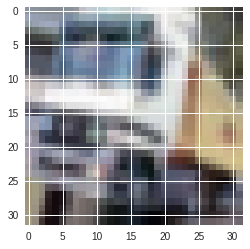

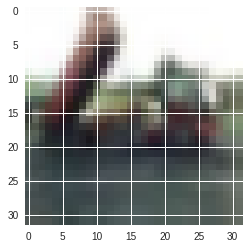

(2, 32, 32, 3)


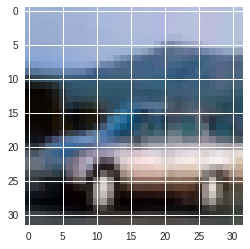

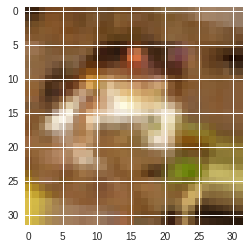

(1, 32, 32, 3)


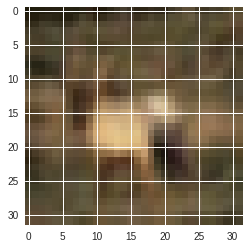

IndexError: ignored

In [0]:
#datagenの挙動確認
import matplotlib.pyplot as plt
%matplotlib inline
for x_batch, y_batch in datagen.flow(X_train[:5], y_train[:5], batch_size=2):
  print(x_batch.shape)
  for i in range(2):
    plt.imshow(x_batch[i])
    #表示
    plt.show()
  